## CONFRONTO MISURE DI $\omega_0$ $\gamma$

In [16]:
import numpy as np

# oscillazioni libere
w0_l, sw0_l = 2.620, 0.012


# oscillazioni smorzate
w0_s, sw0_s = 2.576, 0.037
g_s, sg_s = 0.164, 0.007


# oscillazioni forzate
w0_f, sw0_f = 2.589, 0.008
g_f, sg_f = 0.194, 0.012

### Confronto fra le misure:

$t = \frac{|\omega_a - \omega_b|}{\sqrt{\sigma_a^2 + \sigma_b^2}}$

In [17]:
from interpolazione3 import probability_under_norm

# calcolo del t per il t-test
t1 = np.round(np.abs(w0_l - w0_s)/np.sqrt(sw0_l**2 + sw0_s**2))
t2 = np.round(np.abs(w0_f - w0_s)/np.sqrt(sw0_f**2 + sw0_s**2))
t3 = np.round(np.abs(w0_l - w0_f)/np.sqrt(sw0_l**2 + sw0_f**2))

p1 = np.round(1 - probability_under_norm(0,1,t1),3)
p2 = np.round(1 - probability_under_norm(0,1,t2),3)
p3 = np.round(1 - probability_under_norm(0,1,t3),3)

print("Compatibilità omega 0: ")
print("pLS: ",p1*100,'%')
print("pSF: ",p2*100,'%')
print("pFL: ",p3*100,'%')

t4 = np.round(np.abs(g_s - g_f)/np.sqrt(sg_f**2 + sg_s**2))
p4 = np.round(1 - probability_under_norm(0,1,t4),3)
# calcolo degli errori relativi percentuali:
print('Compatibilità gamma: ',p3*100,'%')

print("Er% oscillazioni libere-> w0: ",np.round(sw0_l*100/w0_l,1),'%')
print("Er% oscillazioni smorzate-> w0: ",np.round(sw0_s*100/w0_s,1),'%, g: ',np.round(sg_s*100/g_s,1),'%')
print("Er% oscillazioni forzate-> w0: ",np.round(sw0_f*100/w0_f,1),'%, g: ',np.round(sg_f*100/g_f,1),'%')

Compatibilità omega 0: 
pLS:  31.7 %
pSF:  100.0 %
pFL:  4.5 %
Compatibilità gamma:  4.5 %
Er% oscillazioni libere-> w0:  0.5 %
Er% oscillazioni smorzate-> w0:  1.4 %, g:  4.3 %
Er% oscillazioni forzate-> w0:  0.3 %, g:  6.2 %


### grafico per $\omega_0$

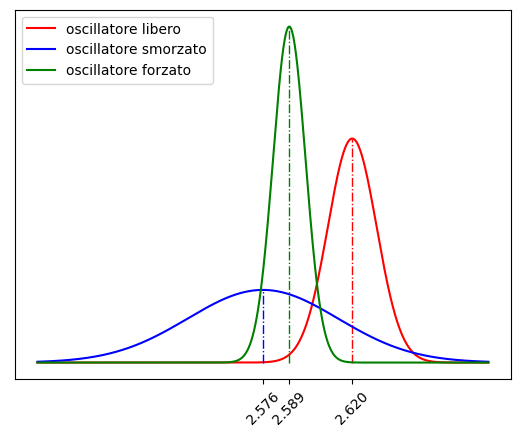

In [18]:
from matplotlib import pyplot as plt
import scipy.stats as sc

x = np.linspace(min(w0_l-3*sw0_l,w0_s-3*sw0_s,w0_f-3*sw0_f),max(w0_l+3*sw0_l,w0_s+3*sw0_s,w0_f+3*sw0_f),1000)

R = sc.norm.pdf(x,loc=w0_l,scale=sw0_l)
plt.plot(x,R, color='red', label='oscillatore libero')
plt.vlines(x=w0_l,ymin=0,ymax=max(R),linewidths=1.0, color='red',linestyle="-.")

B = sc.norm.pdf(x,loc=w0_s,scale=sw0_s)
plt.plot(x,B, color='blue', label='oscillatore smorzato')
plt.vlines(x=w0_s,ymin=0,ymax=max(B),linewidths=1.0, color='blue',linestyle="-.")

V = sc.norm.pdf(x,loc=w0_f,scale=sw0_f)
plt.plot(x,V, color='green', label='oscillatore forzato')
plt.vlines(x=w0_f,ymin=0,ymax=max(V),linewidths=1.0, color='green',linestyle="-.")

plt.title('')
plt.xticks([w0_l,w0_s,w0_f],rotation=45)
plt.yticks([])
plt.legend(loc='upper left')
plt.show()

### grafico per $\gamma$

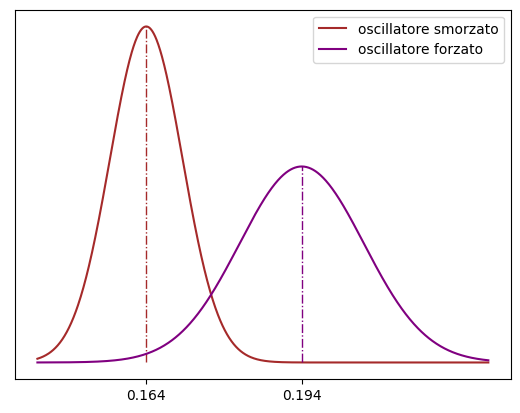

In [21]:
x = np.linspace(min(g_s-3*sg_s,g_f-3*sg_f),max(g_s+3*sg_s,g_f+3*sg_f),1000)

BR = sc.norm.pdf(x,loc=g_s,scale=sg_s)
plt.plot(x,BR, color='brown', label='oscillatore smorzato')
plt.vlines(x=g_s,ymin=0,ymax=max(BR),linewidths=1.0, color='brown',linestyle="-.")

P = sc.norm.pdf(x,loc=g_f,scale=sg_f)
plt.plot(x,P, color='purple', label='oscillatore forzato')
plt.vlines(x=g_f,ymin=0,ymax=max(P),linewidths=1.0, color='purple',linestyle="-.")

plt.title('')
plt.xticks([g_s,g_f])
plt.yticks([])
plt.legend(loc='upper right')
plt.show()